# Problem Set 5: Introduction to PyTorch

**Release Date:** 21 October 2022

**Due Date:** 23:59, 29 October 2022

In the real world, while fundamentals are welcomed and appreciated, implementing algorithms from scratch is time consuming, especially when it comes to Deep Learning (DL) models like neural networks with many layers. Backpropagating manually or by hand is often tedious and erroneous. Which is why, knowing **at least one** Machine Learning library is very very necessary, either to get jobs or build projects in this field. As such, in this *Problem Set 5*, we wish to introduce you to **PyTorch**.

<img src="imgs/img_logo.png" width="600">

`PyTorch` is one of the largest DL libaries widely used around the globe. It offers a very Pythonic API to build layers and compose them together. In fact, data processing is also made easy using the multitude of tools and wrappers that are at your disposal – it is the complete workbench. Of course, there are other popular libraries such as `TensorFlow`, but they require command of "thinking like computation graphs". So, we will not be using it for this module. 

In *Problem Set 5*, we will take you through the `PyTorch` API. You will be building a deep neural network and training it locally on your system via backprop and stochastic gradient descent. Gradually, we'll also show you how to build data processing pipelines to prepare your data before ingestion into your model(s).

In [ ]:
# RUN THIS CELL FIRST
import math

import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# 1 Tensors in PyTorch

### 1.1 Concept - What are Tensors?

In Linear Algebra, you've learned about vectors – they are 1-dimensional (1D) serial arrays (like `[1, 2, 3, 4, 23, 18]`) containing a column (or row) of information. You've also learned about matrices – they are "rectangles" (i.e., 2D) that also capture elements.

**Tensors** generalise the concept of matrices: they are $n$-dimensional arrays that contain or represent information. In *PyTorch*, everything is defined as a `tensor`. It's analogous to `np.array(...)` from *NumPy*. A `tensor` object in *PyTorch* looks like this:

<img src="imgs/img_tensors.png" width="600">

Notice that tensors have a `.grad` attribute. This is used for automatic gradient computation.  
To create tensors, you can use the `torch.tensor(...)` constructor:  

A 0-dimensional tensor: `torch.tensor(5.0)`  
A 1-dimensional tensor: `torch.tensor([1.0, 2.0, 3.0])`  
A 2-dimensional tensor: `torch.tensor([[.4, .3], [.1, .2]])`  

If automatic gradient computation is required, then the equivalent constructors will be:  
`torch.tensor(5.0, requires_grad=True)`  
`torch.tensor([1.0, 2.0, 3.0], requires_grad=True)`  
`torch.tensor([[.4, .3], [.1, .2]], requires_grad=True)`  

**Tensors**, like *NumPy* arrays, can have arbitrary number of dimensions, and you can easily create $n$-dimensional tensors.

Check the command glossary for reference on how to create tensors.

### 1.2 Demo - Working with Tensors

Here, we use `torch.linspace` to create a `torch.tensor`. In PyTorch, and Machine Learning in general, tensors form the basis of all operations.

We then make use of the built-in *PyTorch* function `torch.sin` to create the corresponding y-values of a sine function, and plot the points using *Matplotlib*.

In [ ]:
# This is a demonstration: You just need to run this cell without editing.

x = torch.linspace(-math.pi, math.pi, 1000) # Task 1.1: What is torch.linspace?
y_true = torch.sin(x)

plt.plot(x, y_true, linestyle='solid', label='sin(x)')
plt.axis('equal')
plt.title('Original function to fit')
plt.legend()
plt.show()

In [ ]:
# Run this cell to explore what the FIRST 10 VALUES of x has been assigned to.
# By default, each cell will always print the output of the last expression in the cell
# You can explore what x is by modifying the expression e.g. x.max(), x.shape
x[:10]

### 1.3 Task 1 - What is `torch.linspace`?

From the example above, answer the following questions:

1. What does `x = torch.linspace(-math.pi, math.pi, 1000)` do?  
2. How many values are stored `x`?  
3. What is the minimum and maximum values of `x`?  

### 1.4 Demo - Using Tensors for linear regression

For this example, we fit a **degree 3 polynomial** to the sine function, using a learning rate of 1e-6 and 5000 iterations.

In [ ]:
# This is a demonstration: You just need to run this cell without editing.

# Set learning rate
learning_rate = 1e-6

# Initialize weights to 0
a = torch.tensor(0.)
b = torch.tensor(0.)
c = torch.tensor(0.)
d = torch.tensor(0.)

print('iter', 'loss', '\n----', '----', sep='\t')
for t in range(1, 5001): # 5000 iterations
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x**2 + d * x**3

    # Compute MSE loss
    loss = torch.mean(torch.square(y_pred - y_true))
    if t % 1000 == 0:
        print(t, loss.item(), sep='\t')

    # Backprop
    grad_y_pred = 2.0 * (y_pred - y_true) / y_pred.shape[0]
    # Compute gradients of a, b, c, d with respect to loss
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# print fitted polynomial
equation = f'{a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3'

y_pred = a + b * x + c * x**2 + d * x**3
plt.plot(x, y_true, linestyle='solid', label='sin(x)')
plt.plot(x, y_pred, linestyle='dashed', label=f'{equation}')
plt.axis('equal')
plt.title('3rd degree poly fitted to sine (MSE loss)')
plt.legend()
plt.show()

### 1.5 Demo - Using autograd to automatically compute gradients

In the previous example, we explicitly computed the gradient for Mean Squared Error (MSE)  
`grad_y_pred = 2.0 * (y_pred - y_true) / y_pred.shape[0]`

In the next example, we will use PyTorch's autograd functionality to help us compute the gradient for **Mean Absolute Error (MAE)**.  
In order to compute the gradients, we will use the `.backward()` method of *PyTorch* tensors.

Once again, we fit a **degree 3 polynomial** to the sine function, using a learning rate of `1e-6` and `5000` iterations.  
This time, we will use MAE instead of MSE.

In [ ]:
# This is a demonstration: You just need to run this cell without editing.

# Set learning rate
learning_rate = 1e-6

# Initialize weights to 0
a = torch.tensor(0., requires_grad=True)
b = torch.tensor(0., requires_grad=True)
c = torch.tensor(0., requires_grad=True)
d = torch.tensor(0., requires_grad=True)

print('iter', 'loss', '\n----', '----', sep='\t')
for t in range(1, 5001):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    # print(y_pred)
    # break

    # Compute MAE loss
    loss = torch.mean(torch.abs(y_pred - y_true))
    if t % 1000 == 0:
        print(t, loss.item(), sep='\t')

    # Automatically compute gradients
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        a.grad.zero_() # reset gradients !important
        b.grad.zero_() # reset gradients !important
        c.grad.zero_() # reset gradients !important
        d.grad.zero_() # reset gradients !important
        # What happens if you don't reset the gradients?

# print fitted polynomial
equation = f'{a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3'

y_pred = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_true, linestyle='solid', label='sin(x)')
plt.plot(x, y_pred.detach().numpy(), linestyle='dashed', label=f'{equation}')
plt.axis('equal')
plt.title('3rd degree poly fitted to sine (MAE loss)')
plt.legend()
plt.show()

### 1.6 Task 2 - Polyfit model

We have demonstrated how to fit a degree-3 polynomial to a set of `x` and `y` points (following the sine curve), using two different types of loss functions (MSE and MAE).  

Now, your task is to write a function `polyfit` that takes in some arbitrary set of points, 
1. `x`, corresponding x-values,  
2. `y`, corresponding true y-values,  
3. `loss_fn` to compute the loss, given the true `y` and predicted `y`,  
4. `n` representing the $n$-degree polynomial, and 
5. `lr` learning rate, and  
6. `n_iter` for the number of times to iterate.  

Return the 1D tensor containing the coefficients of the $n$-degree polynomial , after fitting the model.  
The coefficients should be arranged in ascending powers of $x$.

For example,
```
>>> y = torch.sine(x)
>>> mse = lambda y_true, y_pred: torch.mean(torch.square(y_pred - y_true))
>>> mae = lambda y_true, y_pred: torch.mean(torch.abs(y_pred - y_true))

>>> polyfit(x, y, mse, 3, 1e-3, 5000)
tensor([-4.2270e-09,  8.5167e-01,  1.2131e-08, -9.2587e-02], requires_grad=True))

>>> polyfit(x, y, mae, 3, 1e-3, 5000)
tensor([-9.6776e-07,  8.7905e-01, -2.4784e-06, -9.8377e-02], requires_grad=True))
```

*Note: For this regression problem, initialize your weights to 0.0.*

In [ ]:
def polyfit(x, y, loss_fn, n, lr, n_iter):
    """
    PARAMS:
        x : original 1-D x-values
        y : corresponding 1-D y-values
        loss_fn : function to measure loss
        n : nth-degree polynomial
        lr : learning rate
        n_iter : the number of iterations of gradient descent
        
    RETURNS:
        The near-optimal coefficients of the
        nth-degree polynomial after `n_iter` epochs
    """
    # Initialize weights to 0
    shape = (n + 1, 1)
    weights_tensor = torch.zeros(shape, requires_grad=True)
    power_tensor = torch.linspace(1, n, n)
    poly_x_tensor = x.reshape((x.shape[0], 1)) ** power_tensor
    bias_tensor = torch.ones((x.shape[0], 1), requires_grad=True)
    poly_x_tensor = torch.cat((bias_tensor, poly_x_tensor), 1)
    

    # print('iter', 'loss', '\n----', '----', sep='\t')
    for t in range(n_iter):
        # Forward pass: compute predicted y
        y_pred = poly_x_tensor @ weights_tensor

        # Compute MAE loss
        loss = loss_fn(y, y_pred.reshape((y_pred.shape[0], )))
        # if t % 1000 == 0:
        #     print(t, loss.item(), sep='\t')

        # Automatically compute gradients
        loss.backward()

        # Update weights using gradient descent
        with torch.no_grad():
            weights_tensor -= lr * weights_tensor.grad
            weights_tensor.grad.zero_()

    return weights_tensor.reshape((weights_tensor.shape[0], ))

# print fitted polynomial
equation = f'{a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3'

x = torch.linspace(-math.pi, math.pi, 1000)

# Original true values
y = torch.sin(x)
plt.plot(x, y, linestyle='solid', label='sin(x)')

# MSE
mse = lambda y_true, y_pred: torch.mean(torch.square(y_pred - y_true))
a, b, c, d = polyfit(x, y, mse, 3, 1e-3, 5000)
y_pred_mse = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_pred_mse.detach().numpy(), linestyle='dashed', label=f'mse')

# MAE
mae = lambda y_true, y_pred: torch.mean(torch.abs(y_pred - y_true))
# a, b, c, d = polyfit(x, y, mae, 3, 1e-3, 5000)
a, b, c, d = torch.tensor([-9.6776e-07,  8.7905e-01, -2.4784e-06, -9.8377e-02], requires_grad=True)
y_pred_mae = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_pred_mae.detach().numpy(), linestyle='dashed', label=f'mae')
e, f, g, h = polyfit(x, y, mae, 3, 1e-3, 5000)
y_pred_mae_mine = e + f * x + g * x ** 2 + h * x ** 3
plt.plot(x, y_pred_mae_mine.detach().numpy(), linestyle='dashed', label=f'mae_mine')

plt.axis('equal')
plt.title('Comparison of different fits')
plt.legend()
plt.show()

### 1.7 Task 3 - Observations on different model configurations

Run `polyfit` on these model configurations and state your observations.

1. `polyfit(x, y, mse, 3, 1e-6, 5000)`
2. `polyfit(x, y, mse, 3, 1e6, 5000)`
3. `polyfit(x, y, mse, 1, 1e-3, 5000)`
4. `polyfit(x, y, mse, 6, 1e-3, 5000)`

tensor(nan, grad_fn=<UnbindBackward0>) tensor(nan, grad_fn=<UnbindBackward0>) tensor(nan, grad_fn=<UnbindBackward0>) tensor(nan, grad_fn=<UnbindBackward0>) tensor(nan, grad_fn=<UnbindBackward0>) tensor(nan, grad_fn=<UnbindBackward0>) tensor(nan, grad_fn=<UnbindBackward0>)


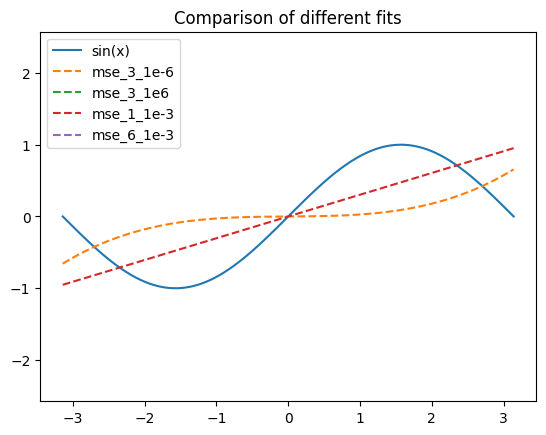

In [84]:
# You may use this cell to run your observations

x = torch.linspace(-math.pi, math.pi, 1000)

# Original true values
y = torch.sin(x)
plt.plot(x, y, linestyle='solid', label='sin(x)')

# MSE
# mse = lambda y_true, y_pred: torch.mean(torch.square(y_pred - y_true))
# a, b, c, d = polyfit(x, y, mse, 3, 1e-3, 5000)
# y_pred_mse = a + b * x + c * x ** 2 + d * x ** 3
# plt.plot(x, y_pred_mse.detach().numpy(), linestyle='dashed', label=f'mse')

a, b, c, d = polyfit(x, y, mse, 3, 1e-6, 5000)
y_pred_mse = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_pred_mse.detach().numpy(), linestyle='dashed', label=f'mse_3_1e-6')

a, b, c, d = polyfit(x, y, mse, 3, 1e6, 5000)
y_pred_mse = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_pred_mse.detach().numpy(), linestyle='dashed', label=f'mse_3_1e6')

a, b = polyfit(x, y, mse, 1, 1e-3, 5000)
y_pred_mse = a + b * x
plt.plot(x, y_pred_mse.detach().numpy(), linestyle='dashed', label=f'mse_1_1e-3')

a, b, c, d, e, f, g = polyfit(x, y, mse, 6, 1e-3, 5000)
print(a, b, c, d, e, f, g)
y_pred_mse = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 + f * x ** 5 + g * x ** 6
plt.plot(x, y_pred_mse.detach().numpy(), linestyle='dashed', label=f'mse_6_1e-3')

plt.axis('equal')
plt.title('Comparison of different fits')
plt.legend()
plt.show()

---
# 2 Computing gradients for arbitrary graphs

Recall the neural network for `y = |x-1|` from the lecture.

<img src="imgs/img_toy_nn.jpg" width="400">

### 2.1 Task 4 - Forward pass

In this task, you are required implement the function `forward_pass` that takes in 4 arguments:  
1. `x`, the input values (not including bias)
2. `w0`, (2x2) weights of the hidden layer
3. `w1`, (3x1) weights of the output layer
4. `activation_fn`, the activation function of the hidden layer.

*Note: As in the lecture, there will be no activation for the output layer (e.g. the activation function of the output layer is the identity function `lambda x: x`)*

In [ ]:
x = torch.linspace(-10, 10, 1000).reshape(-1, 1)
y = torch.abs(x-1)

def forward_pass(x, w0, w1, activation_fn):
    x = torch.cat((torch.ones((x.shape[0], 1)), x), dim=1)
    a = activation_fn(x @ w0)
    a = torch.cat((torch.ones((a.shape[0], 1)), a), dim=1)
    y = a @ w1
    return y

# Exact weights
w0 = torch.tensor([[-1., 1.], [1., -1.]], requires_grad=True)
w1 = torch.tensor([[0.], [1.], [1.]], requires_grad=True)

# Performing a forward pass on exact solution for weights will give us the correct y values
x_sample = torch.linspace(-2, 2, 5).reshape(-1, 1)
forward_pass(x_sample, w0, w1, torch.relu) # tensor([[3.], [2.], [1.], [0.], [1.]])

### 2.2 Task 5 - Backward propagation

In this task, will start with random weights for `w0` and `w1`, and iteratively perform forward passes and backward propagation multiple times to converge on a solution.

Submit your values of `w0`, `w1`, and `loss` value onto Coursemology. Your `loss` value should be less than 1.

*Note: To make your code reproducible, we set the random seed of PyTorch to some fixed value.*  

In [ ]:
def back_prop(seed, num_iter, lr):
    torch.manual_seed(seed) # Set seed to some fixed value

    w0 = torch.randn(2, 2, requires_grad=True)
    w1 = torch.randn(3, 1, requires_grad=True)

    learning_rate = lr
    # print('iter', 'loss', '\n----', '----', sep='\t')
    final_loss = 100
    for t in range(1, num_iter + 1):
    # t = 0
    # while final_loss > 1:
        # Forward pass: compute predicted y
        # t += 1
        y_pred = forward_pass(x, w0, w1, torch.relu)

        loss = torch.mean(torch.square(y - y_pred))
        loss.backward()
        final_loss = loss

        # if t % 1000 == 0:
        #     print(t, loss.item(), sep='\t')

        with torch.no_grad():
            # Update weights and then reset the gradients to zero
            w0 -= learning_rate * w0.grad
            w0.grad.zero_()
            w1 -= learning_rate * w1.grad
            w1.grad.zero_()

    print("--- w0 ---", w0, sep='\n')
    print("--- w1 ---", w1, sep='\n')
    y_pred = forward_pass(x, w0, w1, torch.relu)
    plt.plot(x, y_pred.detach().numpy(), linestyle='dashed', label=f'perceptron_{seed}')
    print(f"Final loss: {final_loss} for seed: {seed}, iters: {t}, lr: {lr}")

back_prop(0, 10001, 1e-2)
back_prop(10, 10001, 1e-2)
back_prop(20, 10001, 1e-2)
back_prop(30, 10001, 1e-2)
# back_prop(1, 10001, 1e-2)
# back_prop(3, 10001, 1e-2)
# back_prop(1, 200001, 5e-5)
# back_prop(5, 30001, 1e-3)
# back_prop(1000, 30001, 1e-3)


# plt.plot(x, y, linestyle='solid', label='|x-1|')
plt.axis('equal')
plt.title('Fit NN on abs function')
plt.legend()
plt.show()

# Task 5: Submit the values of `w0`, `w1`, and `loss` values after fitting
# Note: An acceptable loss value should be less than 1.0
#       You should try adjusting the random seed, learning rate, or 
#       number of iterations to improve your model.

w0   = [[0.0, 0.0], [0.0,  0.0]] # to be computed
w1   = [[0.0], [0.0], [0.0]]     # to be computed
loss = 0.0                       # to be computed

### 2.3 Task 6 - Different random seeds

Try to fit the model on different initial random weight values by adjusting the random seed.  
What does this tell you about the effect of the randomly initialized weights?  

Submit your observations and conclusion on Coursemology.

---

# 3 Neural Networks (using PyTorch layers)

In part 2, you explicitly created weights and biases.  
For larger networks, doing this will be extremely tedious.  

PyTorch abstracts that away using the `nn.Linear(in_dimensions, out_dimensions)` layer that does this under the hood.  
`Linear` represents a fully connected layer with bias automatically included.  
If you do not wish to include a bias column, you can simply call `nn.Linear(in_dimensions, out_dimensions, bias=False)` instead.

PyTorch has many other layers implemented for various model architectures.  
You can read more in the glossary as well as in the docs: https://pytorch.org/docs/stable/nn.html  
For now, we will only be using fully connected `Linear` layers.

In this task, we inherit from PyTorch's `nn.Module` class (remember Object-oriented Programming?) to build the model from the previous task `y = |x-1|` from the lecture.  
<img src="imgs/img_toy_nn.jpg" width="400">  
This should allow you to appreciate the ease in which we can build neural networks using PyTorch.  

The `nn.Module` class is an interface that houses two main methods: `__init__`, where we instantiate our layers and activation functions, and `forward`, that performs the forward pass.

### 3.1 Task 7 - Forward pass

The model has been built for you in `__init__`. You need to implement the `forward` method, making use of the layers `self.l1`, `self.l2`, and the activation function `self.relu`.

In [ ]:
class MyFirstNeuralNet(nn.Module):
    def __init__(self): # set the arguments you'd need
        super().__init__()
        self.l1 = nn.Linear(1, 2) # bias included by default
        self.l2 = nn.Linear(2, 1) # bias included by default
        self.relu = nn.ReLU()

    # Task 3.1: Forward pass
    def forward(self, x):
        linear = self.l1(x)
        linear2 = self.l2(self.relu(linear))
        return linear2

### 3.2 Demo - Backward propagation

To test your model, you can run the code below.  
Take note, if you make changes to your model (e.g. fix any bugs in your forward pass), then you will have to re-run your previous cell to update the model definition.

In [ ]:
epochs = 10000

model = MyFirstNeuralNet()
# the optimizer controls the learning rate
optimiser = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0)
loss_fn = nn.MSELoss()

x = torch.linspace(-10, 10, 1000).reshape(-1, 1)
y = torch.abs(x-1)

print('Epoch', 'Loss', '\n-----', '----', sep='\t')
for i in range(1, epochs+1):
    # reset gradients to 0
    optimiser.zero_grad()
    # get predictions
    y_pred = model(x)
    # compute loss
    loss = loss_fn(y_pred, y)
    # backpropagate
    loss.backward()
    # update the model weights
    optimiser.step()

    if i % 1000 == 0:
        print (f"{i:5d}", loss.item(), sep='\t')

y_pred = model(x)
plt.plot(x, y, linestyle='solid', label='|x-1|')
plt.plot(x, y_pred.detach().numpy(), linestyle='dashed', label='perceptron')
plt.axis('equal')
plt.title('Fit NN on y=|x-1| function')
plt.legend()
plt.show()

### 3.3 Concept - Save and load models

Your model weights are stored within the model itself.  
You may save/load the model weights:
```
torch.save(model.state_dict(), "path/to/model_state_dict")

model = MyFirstNeuralNet()
model.load_state_dict(torch.load("path/to/model_state_dict"))
```

Alternatively, you can save/load the entire model using
```
torch.save(model, "path/to/model")

model = torch.load("path/to/model")
```

### 3.4 Task 8 - Model weights

For this task, you will print out the trained model's `.state_dict()` and submit this to Coursemology.

*Note: An acceptable loss value should be less than 1.0. If your loss is greater than 1, try re-running with a different random initialization, or adjust your model configuration.*

In [ ]:
# To submit this output
print("--- Submit the OrderedDict below ---")
print(model.state_dict())

### 3.5 Concept - Using NN to recognize handwritten digits

In the final part of this problem set, we will be building a neural network to classify images to their respective digits.  

You will build and train a model on the classic **MNIST Handwritten Digits** dataset. Each grayscale image is a $28 \times 28$ matrix/tensor that looks like so:

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="500" />

MNIST is a classification problem and the task is to take in an input image and classify them into one of ten buckets: the digits from $0$ to $9$. 

### 3.5 Demo - Loading an external dataset

The cell below imports the MNIST dataset, which is already pre-split into train and test sets.  

The download takes approximately 63MB of space.

In [ ]:
# DO NOT REMOVE THIS CELL – THIS DOWNLOADS THE MNIST DATASET
# RUN THIS CELL BEFORE YOU RUN THE REST OF THE CELLS BELOW
from torchvision import datasets

# This downloads the MNIST datasets ~63MB
mnist_train = datasets.MNIST("./", train=True, download=True)
mnist_test  = datasets.MNIST("./", train=False, download=True)

x_train = mnist_train.data.reshape(-1, 784) / 255
y_train = mnist_train.targets
    
x_test = mnist_test.data.reshape(-1, 784) / 255
y_test = mnist_test.targets

### 3.6 Task 9 - Define the model architechure and implement the forward pass
Create a 3-layer network in the `__init__` method of the model `DigitNet`.  
These layers are all `Linear` layers and should correspond to the following the architecture:

<img src="imgs/img_linear_nn.png" width="600">

In our data, a given image $x$ has been flattened from a 28x28 image to a 784-length array.

After initializing the layers, stitch them together in the `forward` method. Your network should look like so:

$$x \rightarrow \text{Linear(512)} \rightarrow \text{ReLU} \rightarrow \text{Linear(128)} \rightarrow \text{ReLU} \rightarrow \text{Linear(10)} \rightarrow \text{Softmax} \rightarrow \hat{y}$$

**Softmax Layer**: The final softmax activation is commonly used for classification tasks, as it will normalizes the results into a vector of values that follows a probability distribution whose total sums up to 1. The output values are between the range [0,1] which is nice because we are able to avoid binary classification and accommodate as many classes or dimensions in our neural network model.

*Note: When using `torch.softmax(...)` on the final layer, ensure you are applying it on the correct dimension (as you did in NumPy via the `axis` argument in popular methods)*

In [101]:
class DigitNet(nn.Module):
    def __init__(self, input_dimensions, num_classes): # set the arguments you'd need
        super().__init__()
        """
        YOUR CODE HERE
        
        - your network should work for any input and output size 
            – add appropriate arguments in the object constructor
        - create the 3 layers (and a ReLU layer) using the torch.nn layers API
        """
        self.l1 = nn.Linear(input_dimensions, 512)
        self.l2 = nn.Linear(512, 128)
        self.l3 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        """
        Performs the forward pass for the network.
        
        PARAMS:
            x : the input tensor (batch size is the entire dataset)
            
        RETURNS
            the output of the entire 3-layer model
        """
        
        """
        YOUR CODE
        
        - pass the inputs through the sequence of layers
        - run the final output through the Softmax function on the right dimension!
        """
        linear = self.l1(x)
        linear2 = self.l2(self.relu(linear))
        linear3 = self.l3(self.relu(linear2))
        return torch.softmax(linear3, dim = 1)

### 3.7 Task 10 - Training Loop

As demonstrated in Section 3.2, implement the function `train_model` that performs the following for every epoch/iteration:

1. set the optimizer's gradients to zero
2. forward pass
3. calculate the loss
4. backpropagate using the loss
5. take an optimzer step to update weights

This time, use the Adam optimiser to train the network.  
Use Cross-Entropy Loss, since we are performing a classification.  
Train for 20 epochs.  

*Note: refer to the command glossary to find out how to instantiate optimisers, losses, and more*

In [103]:
def train_model(x_train, y_train, epochs=20):
    """
    Trains the model for 20 epochs/iterations
    
    PARAMS:
        x_train : a tensor of training features of shape (60000, 784)
        y_train : a tensor of training labels of shape (60000, 1)
        epochs  : number of epochs, default of 20
        
    RETURNS:
        the final model 
    """
    model = DigitNet(784, 10)
    optimiser = torch.optim.Adam(model.parameters()) # use Adam
    loss_fn = nn.CrossEntropyLoss()  # use cross-entropy loss

    for i in range(epochs):
        optimiser.zero_grad()
        y_pred = model.forward(x_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        optimiser.step()

    return model
                
digit_model = train_model(x_train, y_train, 50)

### 3.8 Demo - Explore your model

Now that we have trained the model, let us run some predictions on the model.

true label: 7
pred label: 7


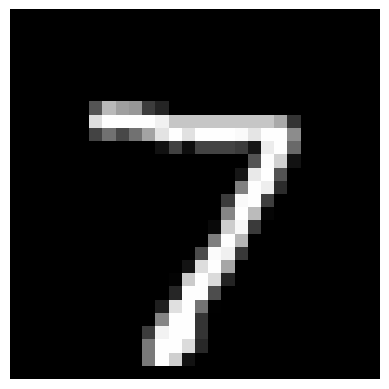

true label: 2
pred label: 2


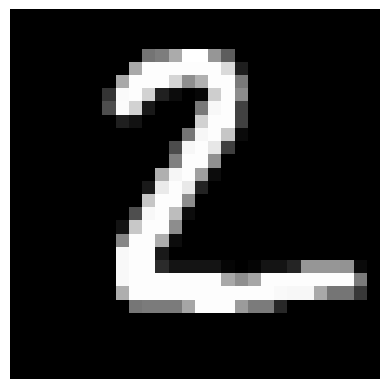

true label: 1
pred label: 1


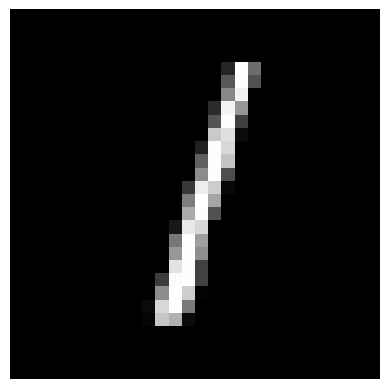

true label: 0
pred label: 0


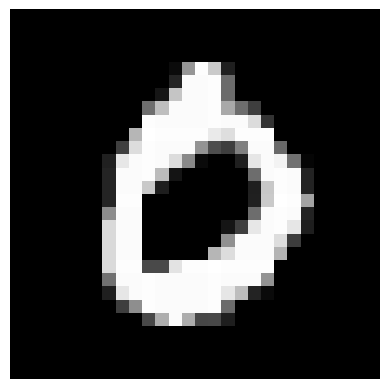

true label: 4
pred label: 4


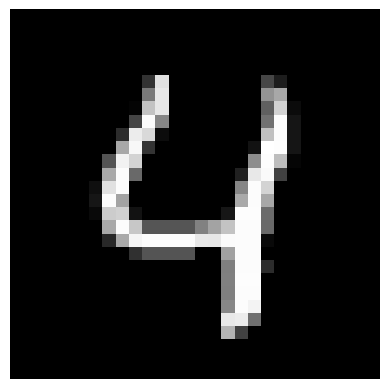

true label: 1
pred label: 1


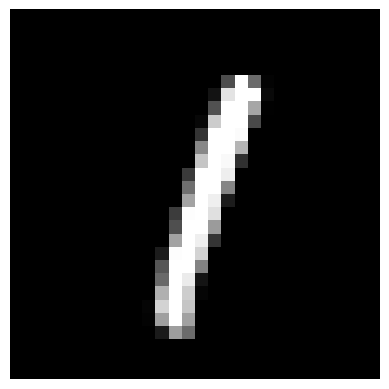

true label: 4
pred label: 4


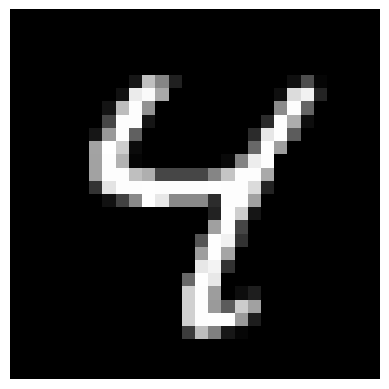

true label: 9
pred label: 9


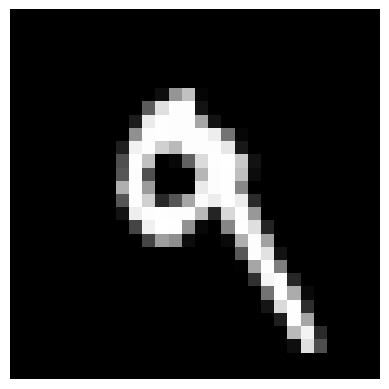

true label: 5
pred label: 4


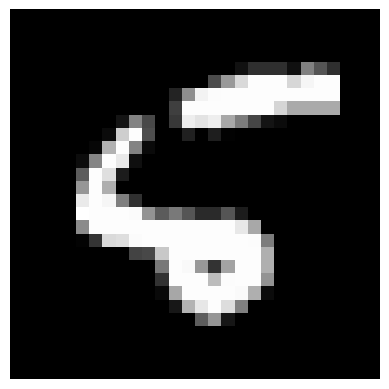

true label: 9
pred label: 9


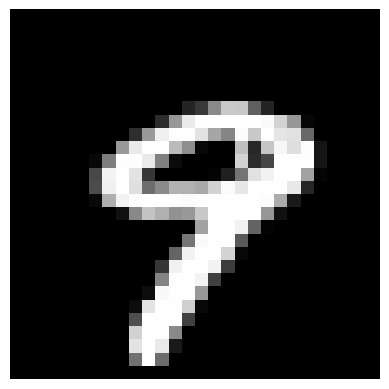

In [104]:
# This is a demonstration: You can use this cell for exploring your trained model
for i in range(10):
    idx = i # try on some index

    scores = digit_model(x_test[idx:idx+1])
    _, predictions = torch.max(scores, 1)
    print("true label:", y_test[idx].item())
    print("pred label:", predictions[0].item())

    plt.imshow(x_test[idx].numpy().reshape(28, 28), cmap='gray')
    plt.axis("off")
    plt.show()

### 3.9 Task 11 - Evaluate the model

Now that we have trained the model, we should evaluate it using our test set.  
We will be using the accuracy (whether or not the model predicted the correct label) to measure the model performance.  

Since our model takes in a (n x 784) tensor and returns a (n x 10) tensor of probability scores for each of the 10 classes, we need to convert the probability scores into the actual predictions by taking the index of the maximum probability.  

In [106]:
def get_accuracy(scores, labels):
    """
    helper function that returns accuracy of model
    PARAMS:
        scores : the raw softmax scores of the network
        label : the ground truth labels
        
    RETURNS:
        accuracy of the model. Return a number in range [0, 1].
        0 means 0% accuracy while 1 means 100% accuracy
    """
    _, predictions = torch.max(scores, 1)
    accuracy_tensor = torch.where(predictions == labels, 1, 0)
    result = accuracy_tensor.sum() / accuracy_tensor.shape[0]
    return result.item()

scores = digit_model(x_test) # n x 10 tensor
get_accuracy(scores, y_test)

0.9074000120162964

# Submission

Once you are done, please remember to submit your work to Coursemology, by copying the right snippets of code into the corresponding box that says "Your answer", and click "Save". After you save, you can make changes to your submission.

Once you are satisfied with what you have uploaded, click "Finalize submission". **Note that once your submission is finalized, it is considered to be submitted for grading and cannot be changed.** If you need to undo this action, you will have to reach out to your assigned tutor for help. Please do not finalize your submission until you are sure that you want to submit your solutions for grading. 

### HAVE FUN AND ENJOY CODING!